In [229]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [230]:
df=pd.read_csv("D:\Projects\Stock_analysis\data\AAPL_stock_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\KUNAL\AppData\Local\Temp\ipykernel_17816\617425114.py:1: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv("D:\Projects\Stock_analysis\data\AAPL_stock_data.csv")


In [231]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.424604892730713,6.439314685252985,6.3756721867282895,6.407193227963411,493729600
3,2010-01-05,6.4357147216796875,6.472039103383499,6.401791604177357,6.442319300466533,601904800
4,2010-01-06,6.333343982696533,6.46122979510523,6.326739406175394,6.435712513903516,552160000


In [232]:
df.reset_index(inplace=True)
num_cols = ['Open','High','Low','Close','Volume']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [233]:
df.fillna(method='ffill')

C:\Users\KUNAL\AppData\Local\Temp\ipykernel_17816\1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,index,Price,Close,High,Low,Open,Volume
0,0,Ticker,NaN,NaN,NaN,NaN,NaN
1,1,Date,NaN,NaN,NaN,NaN,NaN
2,2,2010-01-04,6.424605,6.439315,6.375672,6.407193,493729600.0
3,3,2010-01-05,6.435715,6.472039,6.401792,6.442319,601904800.0
4,4,2010-01-06,6.333344,6.461230,6.326739,6.435713,552160000.0
...,...,...,...,...,...,...,...
3519,3519,2023-12-22,191.974670,193.769472,191.349955,193.541392,37149600.0
3520,3520,2023-12-26,191.429306,192.262250,191.211152,191.984602,28919300.0
3521,3521,2023-12-27,191.528473,191.875541,189.485769,190.874025,48087700.0
3522,3522,2023-12-28,191.954849,193.025784,191.548288,192.510145,34049900.0


In [234]:
df.dropna().isnull().sum()

index     0
Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [247]:
#cleaned data for arima and prophet forcasting
df_close=df[['Close']].copy()
df_close=df_close.dropna()

In [248]:
df.index = pd.to_datetime(df.index)
df_arima =df_close
df_arima

,Close
1970-01-01 00:00:00.000000002,6.424605
1970-01-01 00:00:00.000000003,6.435715
1970-01-01 00:00:00.000000004,6.333344
1970-01-01 00:00:00.000000005,6.321635
1970-01-01 00:00:00.000000006,6.363664
...,...
1970-01-01 00:00:00.000003519,191.974670
1970-01-01 00:00:00.000003520,191.429306
1970-01-01 00:00:00.000003521,191.528473
1970-01-01 00:00:00.000003522,191.954849


In [249]:
df_reset = df_close.reset_index()
df_prophet = df_reset.rename(columns={'Date': 'ds', 'Close': 'y'})

df_prophet

,index,y
0,1970-01-01 00:00:00.000000002,6.424605
1,1970-01-01 00:00:00.000000003,6.435715
2,1970-01-01 00:00:00.000000004,6.333344
3,1970-01-01 00:00:00.000000005,6.321635
4,1970-01-01 00:00:00.000000006,6.363664
...,...,...
3517,1970-01-01 00:00:00.000003519,191.974670
3518,1970-01-01 00:00:00.000003520,191.429306
3519,1970-01-01 00:00:00.000003521,191.528473
3520,1970-01-01 00:00:00.000003522,191.954849


In [252]:
# for lstm modeling training
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_close)
df_scaled

array([[0.00345728],
       [0.00351554],
       [0.00297868],
       ...,
       [0.97420646],
       [0.97644252],
       [0.97098211]], shape=(3522, 1))

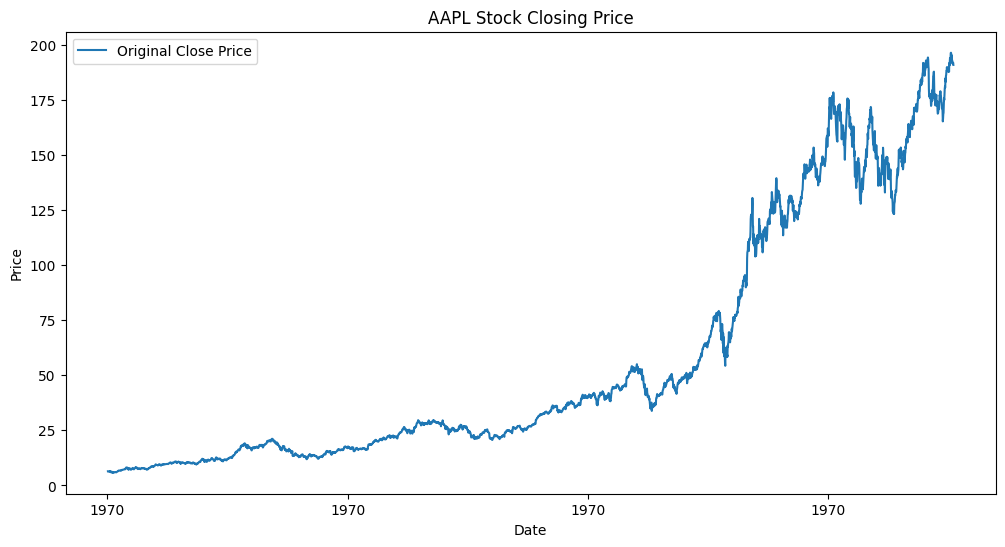

In [254]:
plt.figure(figsize=(12,6))
plt.plot(df_close, label="Original Close Price")
plt.title("AAPL Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()